In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
init_printing()

## Problème I:
<div style="font-size: 20px">
On commence par définir le $f$ du système différentiel et calculer les points stationnaires

In [2]:
x, y = symbols('x, y')
f1 = x*(1 - 2*x - y)
f2 = y*(-2 + 6*x)

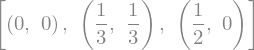

In [3]:
zeros = solve((f1, f2), (x, y))
display(zeros)

<div style="font-size: 20px">
Calcul des valeurs propres et vecteurs propres:
<br>
(la fonction eigenvects affiche la valeur propre, la multiplicité et un vecteur propre associé)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

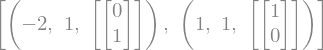

<IPython.core.display.Math object>

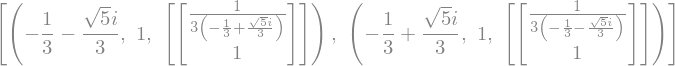

<IPython.core.display.Math object>

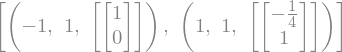

In [5]:
Df = Matrix([[diff(f1,x), diff(f1,y)], [diff(f2,x), diff(f2,y)]])
display(Math('Df(y) = ' + latex(Df)))

Df0 = Df.subs({x: zeros[0][0], y: zeros[0][1]})
display(Math('Df(0,0) = ' + latex(Df0)))
display(Df0.eigenvects())
Df1 = Df.subs({x: zeros[1][0], y: zeros[1][1]})
display(Math('Df(1/3,1/3) = ' + latex(Df1)))
display(Df1.eigenvects())
Df2 = Df.subs({x: zeros[2][0], y: zeros[2][1]})
display(Math('Df(1/2,0) = ' + latex(Df2)))
display(Df2.eigenvects())

<div style="font-size: 20px">
Le point $(0,0)$ est un point selle, le point $(1/3,1/3)$ est un foyer stable et
$(1/2,0)$ est encore unt point selle. Le portrait de phase est tracé ci-dessous.

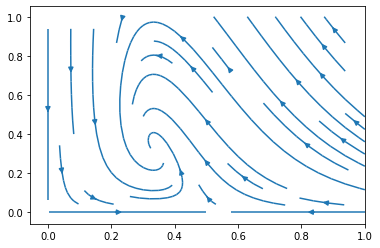

In [6]:
F1 = lambdify([x,y], f1, 'numpy')
F2 = lambdify([x,y], f2, 'numpy')
xx = np.linspace(0,1,100)
X, Y = np.meshgrid(xx,xx)
U = F1(X,Y)
V = F2(X,Y)
plt.figure()
plt.streamplot(X,Y,U,V, density=0.5)

## Problème II:
<div style="font-size: 20px">
Le système différentiel s'écrit
$$
y_1' = y_2 - g(y_1)\\
y_2' = -y_1
$$
Il y a un point stationnaire en $(0,g(0))$. La jacobienne de $f$ en ce point est
$Df(0,g(0)) = \begin{pmatrix} -g'(0)& 1\\ -1 & 0\end{pmatrix}$.
<br>
Les valeurs propres sont donc
$$
\lambda_{1/2} = \frac{1}{2}\left( -g'(0) \pm \sqrt{g'(0)^2 - 4} \right) .
$$
Le point stationnaire est stable si $g'(0) > 0$ et instable si $g'(0) < 0$.
<br>
Dans le cas du circuit de van der Pol $g(x) = x^3 - x$, $g'(0) = -1$,
le point stationnaire est donc instable (c'est un foyer instable).

<div style="font-size: 20px">
$$
\frac{d}{dt}W(y(t)) = y_1 y_1' + y_2 y_2' = y_1 (y_2 - g(y_1)) + y_2(-y_1)\\
  = -y_1(t) g(y_1(t))
$$
Donc $\|y(t)\|$ diminue tant que $-y_1 g(y_1) < 0$. Le circuit est repoussé vers son état
stationnaire, la résistance est passive.
<br>
La "résistance" du circuit de van der Pol ne vérifie pas cette condition pour
$y_1\in [-1,1]$, le point stationnaire est instable, $\|y(t)\|$ est croissante
tant que $y_1(t)\in [-1,1]$. 
<br>
En revanche les trajectoires du circuit ne peuvent pas partir vers l'infini car pour $|y_1|> 1$ on a bien $-y_1 g(y_1) < 0$. Elles convergent vers un cycle limite comme on peut deviner du portrait de phase.

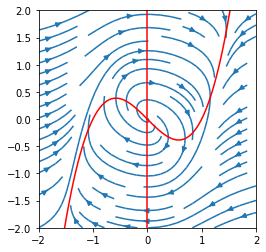

In [7]:
g = x**3 - x
G = lambdify(x,g,'numpy')
f1 = y - g
f2 = -x
F1 = lambdify([x,y], f1, 'numpy')
F2 = lambdify([x,y], f2, 'numpy')
xx = np.linspace(-2,2,100)
X, Y = np.meshgrid(xx,xx)
U = F1(X,Y)
V = F2(X,Y)
plt.figure()
plt.subplot(111)
plt.streamplot(X,Y,U,V, density=0.7)
plt.plot(xx,G(xx), color='r')
n = xx.shape[0]
plt.plot(np.zeros((1,n)).reshape(n, ), xx, color='r')
plt.ylim([-2,2])
plt.gca().set_aspect('equal')
#plt.savefig('phase.png')

## Problème III:
<div style="font-size: 20px">
On s'intéresse au volume $\Omega$ de l'intersection de deux cylindres de rayon $r$.
<br>
Le premier est définie par $x_1^2 + x_2^2 \leq r^2$ et s'étend le long de l'axe $x_3$
et le deuxième est définie par $x_1^2 + x_3^2 \leq r^2$ et s'étend le long de l'axe $x_2$.
<br>
On s'intéresse également à l'aire de la surface $\Sigma = \partial\Omega$. Une partie
$\Sigma_1\subset\Sigma$ est paramétrée par
$$
\varphi(s,t) = (s,t,\sqrt{r^2 - s^2})
$$
où $(s,t)\in D = \{(s,t)\in\mathbb{R}^2: 0\leq s \leq r; 0\leq t \leq \sqrt{r^2 - s^2} \}$
<br>
Le bord de $\Sigma_1$ ainsi que le bord de la face supérieure de $\Sigma$ sont tracés dans
la figure ci-dessous.

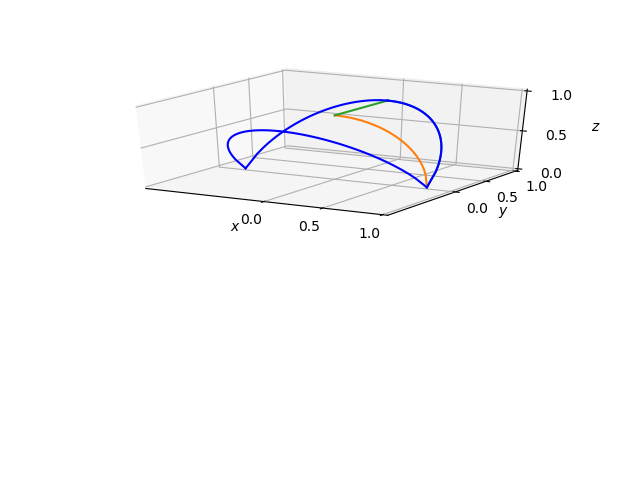

In [11]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')
r = 0.8
s = np.linspace(0,r,50)
x = s
y = np.sqrt(r**2 - s**2)
z = np.sqrt(r**2 - s**2)
ax.plot(x, y, z, label='parametric curve')
#ax.plot(x,y,0)
ax.plot(x,np.zeros(x.shape),z)
ax.plot(np.zeros(x.shape),s,r)
#ax = fig.add_subplot(212, projection='3d')
x = s
y = np.sqrt(r**2 - s**2)
z = np.sqrt(r**2 - s**2)
ax.plot(x, y, z, color='b')
ax.plot(x, -y, z, color='b')
ax.plot(-x, y, z, color='b')
ax.plot(-x, -y, z, color='b')
#ax.plot(x,y,0)
#ax.plot(x,np.zeros(x.shape),z)
#ax.plot(np.zeros(x.shape),s,r)
ax.set_xticks([0,0.5,1])
ax.set_yticks([0,0.5,1])
ax.set_zticks([0,0.5,1])
ax.set_xlabel('$x$') #, fontsize=10, rotation=150)
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([0,1])

<div style="font-size: 20px">
On voit que $\Sigma_1$ correspond à un quart de la partie supérieure de $\Sigma$.
Puisque $\Sigma$ est composée de quatre faces pareilles on a 
$$
|\Sigma| = 16 |\Sigma_1|.
$$
Calculons $|\Sigma_1|$.

In [70]:
s, t = symbols('s,t', real=True, positive=True) 
r = symbols('r', real=True,positive=True)
phi = Matrix([[s], [t], [sqrt(r**2 - s**2)]])
dphids = diff(phi, s)
display(Math('\partial_s\phi = ' + latex(dphids)))
dphidt = diff(phi, t)
display(Math('\partial_t\phi = ' + latex(dphidt)))
cross = simplify(dphids.cross(dphidt))
display(Math('\partial_s \phi\wedge\partial_t\phi = ' + latex(cross)))
norm2 = cross[0]**2 + cross[1]**2 + cross[2]**2
display(Math('\|\partial_s\phi\wedge\partial_t\phi\|^2 = ' + latex(simplify(norm2))))
dS = refine(sqrt(simplify(norm2)), Q.positive(r**2 - s**2))
display(Math('dS = ' + latex(dS) + ' ds dt'))
II = integrate(dS, (t,0,sqrt(r**2 - s**2))) #--intégrale intérieure
I = integrate(II, (s,0,r)) #--intégrale extérieure
display(I)
display(Math('|\Sigma_1| = ' + latex(I)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<div style="font-size: 20px">
Donc $|\Sigma| = 16 r^2$. Finalement, calculons le volume de $\Omega$.

In [72]:
g = Matrix([[0],[0], [sqrt(r**2 - s**2)]])
gdotn = g.dot(cross)
display(Math('(g\cdot n)\: dS = (' + latex(gdotn) + ')\: ds\: dt'))
II = integrate(gdotn, (t,0,sqrt(r**2 - s**2))) #--intégrale intérieure
display(II)
I = integrate(II, (s,0,r)) #--intégrale extérieure
display(I)
display(Math('\int_{\Sigma_1} (g\cdot n)\: dS = ' + latex(I)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<div style="font-size: 20px">
Afin d'obtenir $\int_\Sigma (g\cdot n)\: dS$ on peut raisonner par symétrie.
Pour la partie supérieure de $\Sigma$ on a quatre fois $\int_{\Sigma_1}$.
Pour la partie inférieure on a la même contribution donc $8 \int_{\Sigma_1}$ pour ces deux faces au total. Pour les faces laterales il n'y a pas de contribution car $n$ est
orthogonal à $g$. On a donc
$$
\int_\Sigma (g\cdot n)\: dS = 8 \int_{\Sigma_1} (g\cdot n)\: dS = \frac{16}{3} r^3.
$$
Or, d'aprés Gauss-Green
$$
\int_\Sigma (g\cdot n)\: dS = \int_\Omega \text{div} g\: dx = \int_\Omega 1\: dx = |\Omega|.
$$
On en déduit que $|\Omega| = \frac{16}{3} r^3$.